Vector, Matrix and Tensor

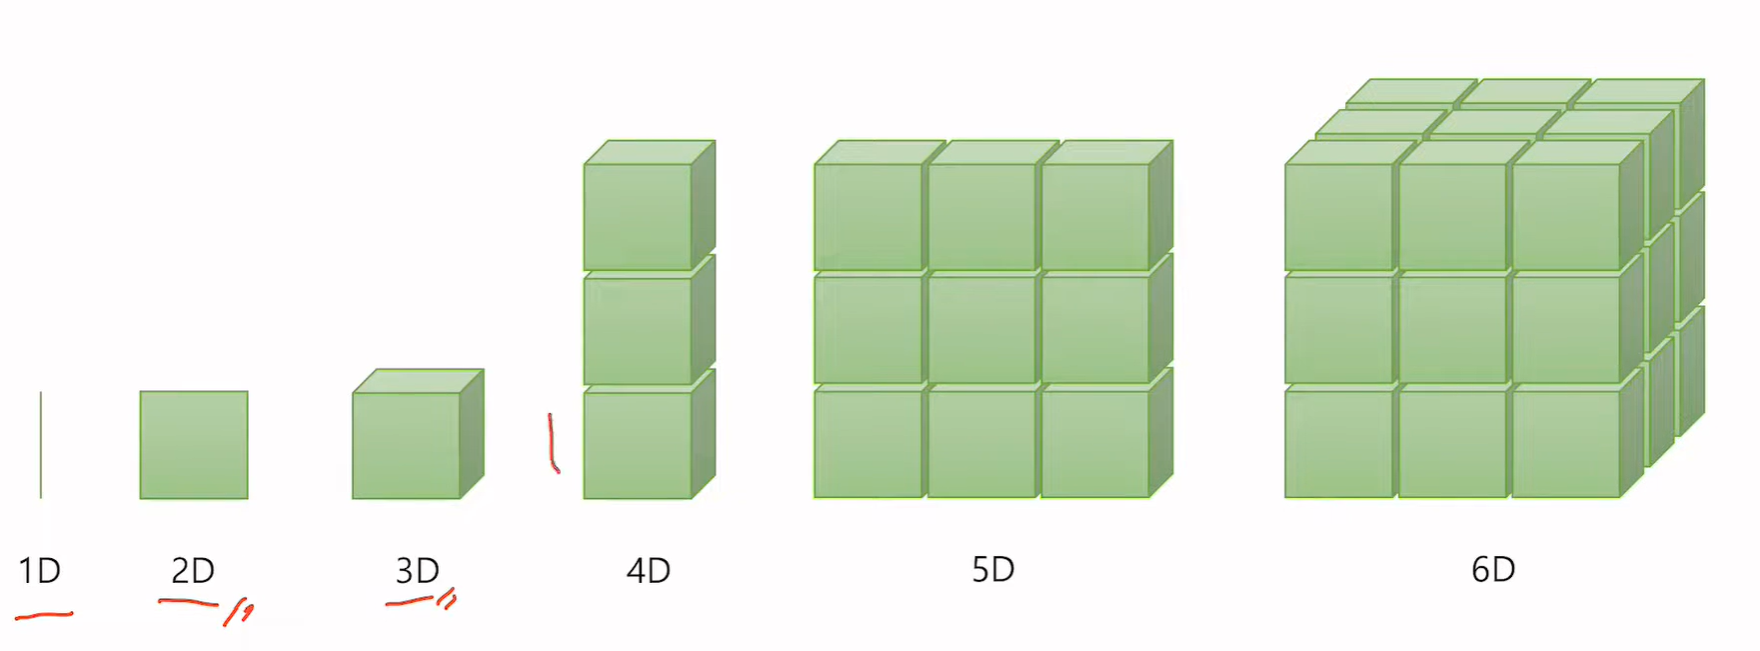

PyTorch Tensor Shape Convention

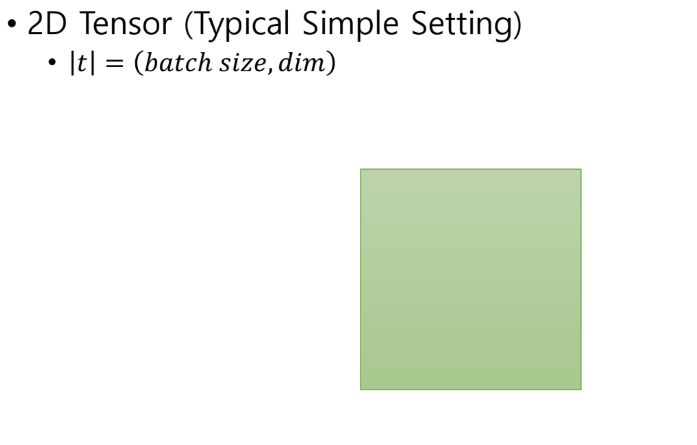

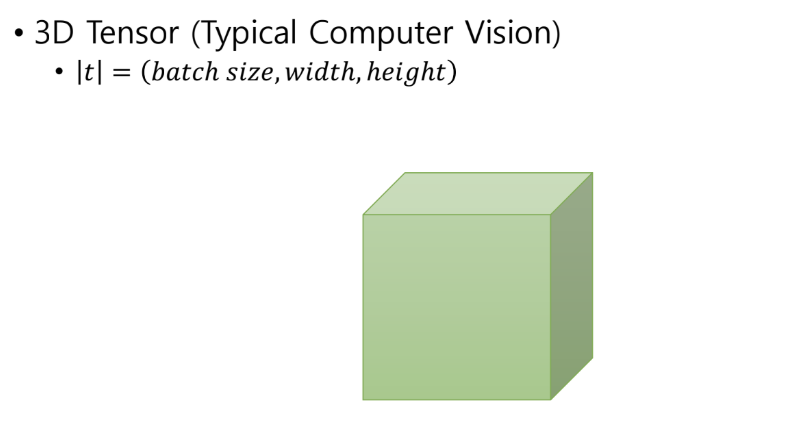

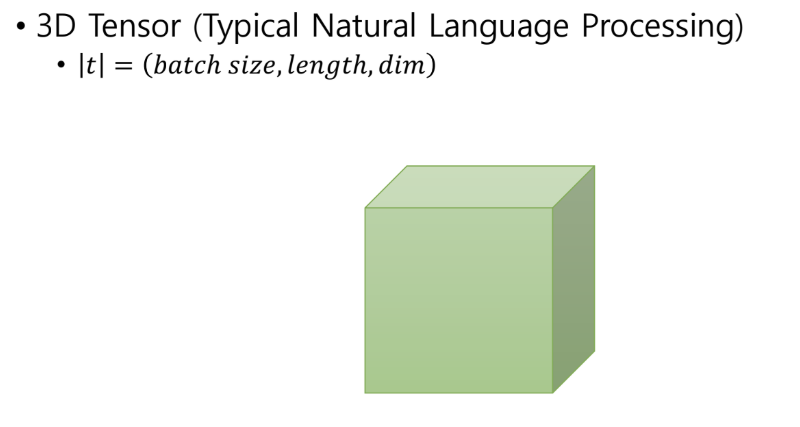

In [3]:
import numpy as np
import torch


NumPy Review

- 1D Array with NumPy

In [ ]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [5]:
print('Rank of t:', t.ndim)
print('Shape of t:', t.shape)
print(t.dtype)

Rank of t: 1
Shape of t: (7,)
float64


In [6]:
print('t[0] t[1] t[-1]= ', t[0], t[1], t[-1]) # Element
print('t[2:5] t[4:-1]= ', t[2:5], t[4:-1])   # Slicing
print('t[:2] t[3:]= ', t[:2], t[3:])      # Slicing

t[0] t[1] t[-1]=  0.0 1.0 6.0
t[2:5] t[4:-1]=  [2. 3. 4.] [4. 5.]
t[:2] t[3:]=  [0. 1.] [3. 4. 5. 6.]


- 2D Array with Numpy

In [7]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [8]:
print('Rank  of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank  of t:  2
Shape of t:  (4, 3)



PyTorch is like NumPy

- 1D Array with PyTorch

In [9]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [10]:
print(t.dim())  # rank
print(t.shape)  # shape
print(t.size()) # shape
print(t[0], t[1], t[-1])  # Element
print(t[2:5], t[4:-1])    # Slicing
print(t[:2], t[3:])       # Slicing

1
torch.Size([7])
torch.Size([7])
tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])



2D Array with PyTorch

In [11]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [12]:
print(t.dim())  # rank
print(t.size()) # shape
print(t[:, 1])
print(t[:, 1].size())
print(t[:, :-1])

2
torch.Size([4, 3])
tensor([ 2.,  5.,  8., 11.])
torch.Size([4])
tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])



Shape, Rank, Axis

In [4]:
t = torch.FloatTensor([[[[1, 2, 3, 4],
                         [5, 6, 7, 8],
                         [9, 10, 11, 12]],
                       [[13, 14, 15, 16],
                        [17, 18, 19, 20],
                        [21, 22, 23, 24]]
                       ]])

In [7]:
print(t.dim())  # rank  = 4
print(t.size()) # shape = (1, 2, 3, 4)

4
torch.Size([1, 2, 3, 4])


Frequently Used Operations in PyTorch

- Mul vs Matmul

In [ ]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print(m1)
print(m2)
print('Shape of Matrix 1: ', m1.shape) 
print('Shape of Matrix 2: ', m2.shape) 
print(m1.matmul(m2)) 
print(m1 * m2) 
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


Broadcasting

In [13]:
# 같은 모양인 경우
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


In [14]:
# Vector + scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # 3 -> [[3, 3]]
print(m1 + m2)

tensor([[4., 5.]])


In [ ]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


Mean

In [17]:
t = torch.FloatTensor([1, 2])
print(t)
print(t.mean())

tensor([1., 2.])
tensor(1.5000)


In [ ]:
# Can't use mean() on integers
t = torch.LongTensor([1, 2]) # 1과 2 는 소수점이 없는 정수 데이터
try:
    print(t.mean())
except Exception as exc:
    print(exc)
# 평균을 내려면 입력값이 실수형(Float)이어야 하나, 정수(Long) 을 주었기 때문에 에러가 남.

mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long


In [19]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [24]:
print(t.mean())
print(t.mean(dim=0)) # 열 방향 평균 -> 행 방향 무시
print(t.mean(dim=1)) # 행 방향 평균 -> 열 방향 무시
print(t.mean(dim=-1))

tensor(3.5000)
tensor([3., 4.])
tensor([1.5000, 3.5000, 5.5000])
tensor([1.5000, 3.5000, 5.5000])


In [37]:
t = torch.FloatTensor([
    [[1, 2], [3, 4], [5, 6]],
    [[7, 8], [9, 10], [11, 12]]])
print(t)
print(t.shape)

tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[ 7.,  8.],
         [ 9., 10.],
         [11., 12.]]])
torch.Size([2, 3, 2])


In [ ]:
# torch.Size([2, 3, 2])
print(t.mean())
print(t.mean(dim=0)) # (2,3,2) -> (3,2)
print(t.mean(dim=1)) # (2,3,2) -> (2,2)
print(t.mean(dim=-1)) # (2,3,2) -> (2,3)

tensor(6.5000)
tensor([[4., 5.],
        [6., 7.],
        [8., 9.]])
tensor([[ 3.,  4.],
        [ 9., 10.]])
tensor([[ 1.5000,  3.5000,  5.5000],
        [ 7.5000,  9.5000, 11.5000]])


In [39]:
import torch

# Shape: (N=2, C=2, H=2, W=2)
t = torch.FloatTensor([
    # 첫 번째 이미지 (N=0)
    [
        [[1, 2], [3, 4]],   # Channel 0 (예: Red)
        [[5, 6], [7, 8]]    # Channel 1 (예: Green)
    ],
    # 두 번째 이미지 (N=1)
    [
        [[9, 10], [11, 12]], # Channel 0
        [[13, 14], [15, 16]] # Channel 1
    ]
])
print(t)
print(t.shape)

tensor([[[[ 1.,  2.],
          [ 3.,  4.]],

         [[ 5.,  6.],
          [ 7.,  8.]]],


        [[[ 9., 10.],
          [11., 12.]],

         [[13., 14.],
          [15., 16.]]]])
torch.Size([2, 2, 2, 2])


Sum

In [42]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)
print(t.shape)

tensor([[1., 2.],
        [3., 4.]])
torch.Size([2, 2])


In [41]:
print(t.sum())
print(t.sum(dim=0))
print(t.sum(dim=1))
print(t.sum(dim=-1))

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


Max and Argmax

In [52]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t.shape)
print(t)

torch.Size([2, 2])
tensor([[1., 2.],
        [3., 4.]])


In [44]:
print(t.max())

tensor(4.)


In [ ]:
print(t.max(dim=0)) # Returns two values: max and argmax
# [0번 열에서 제일 큰 애, 1번 열에서 제일 큰 애]
# [0번 열에서 제일 큰 애가 1번 행에 있음, 1번 열에서 제일 큰 애가 1번 행에 있음]
print()

print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))

Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


In [51]:
print(t.max(dim=1))
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


View

In [54]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],

              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)
print(ft)
print(ft.shape)

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.],
         [ 9., 10., 11.]]])
torch.Size([2, 2, 3])


In [ ]:
print(ft.view([-1, 3]))
# 열의 크기를 3으로 고정
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [56]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


Squeeze

In [57]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [58]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


Unsqueeze

In [59]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [60]:
print(ft.unsqueeze(0))
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [61]:
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [62]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [63]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


Scatter

In [65]:
lt = torch.LongTensor([[0], [1], [2], [0]])
print(lt)
print(lt.shape)

tensor([[0],
        [1],
        [2],
        [0]])
torch.Size([4, 1])


In [66]:
one_hot = torch.zeros(4, 3) # batch_size = 4, classes = 3
one_hot.scatter_(1, lt, 1)
print(one_hot)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]])


Casting

In [67]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [ ]:
# 정수를 실수로(Long -> Float)
print(lt.float())

tensor([1., 2., 3., 4.])


In [ ]:
# 논리값을 숫자로(Byte/Bool->Long/Float)
bt = torch.ByteTensor([True, False, False, True])
print(bt)
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


Concatenation

In [74]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])
print(x)
print(y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])


In [ ]:
print(torch.cat([x, y], dim=0)) # 행 방향
print(torch.cat([x, y], dim=1)) # 열 방향

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


Stacking

In [80]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])
print(x.shape)
print(x,y,z)

torch.Size([2])
tensor([1., 4.]) tensor([2., 5.]) tensor([3., 6.])


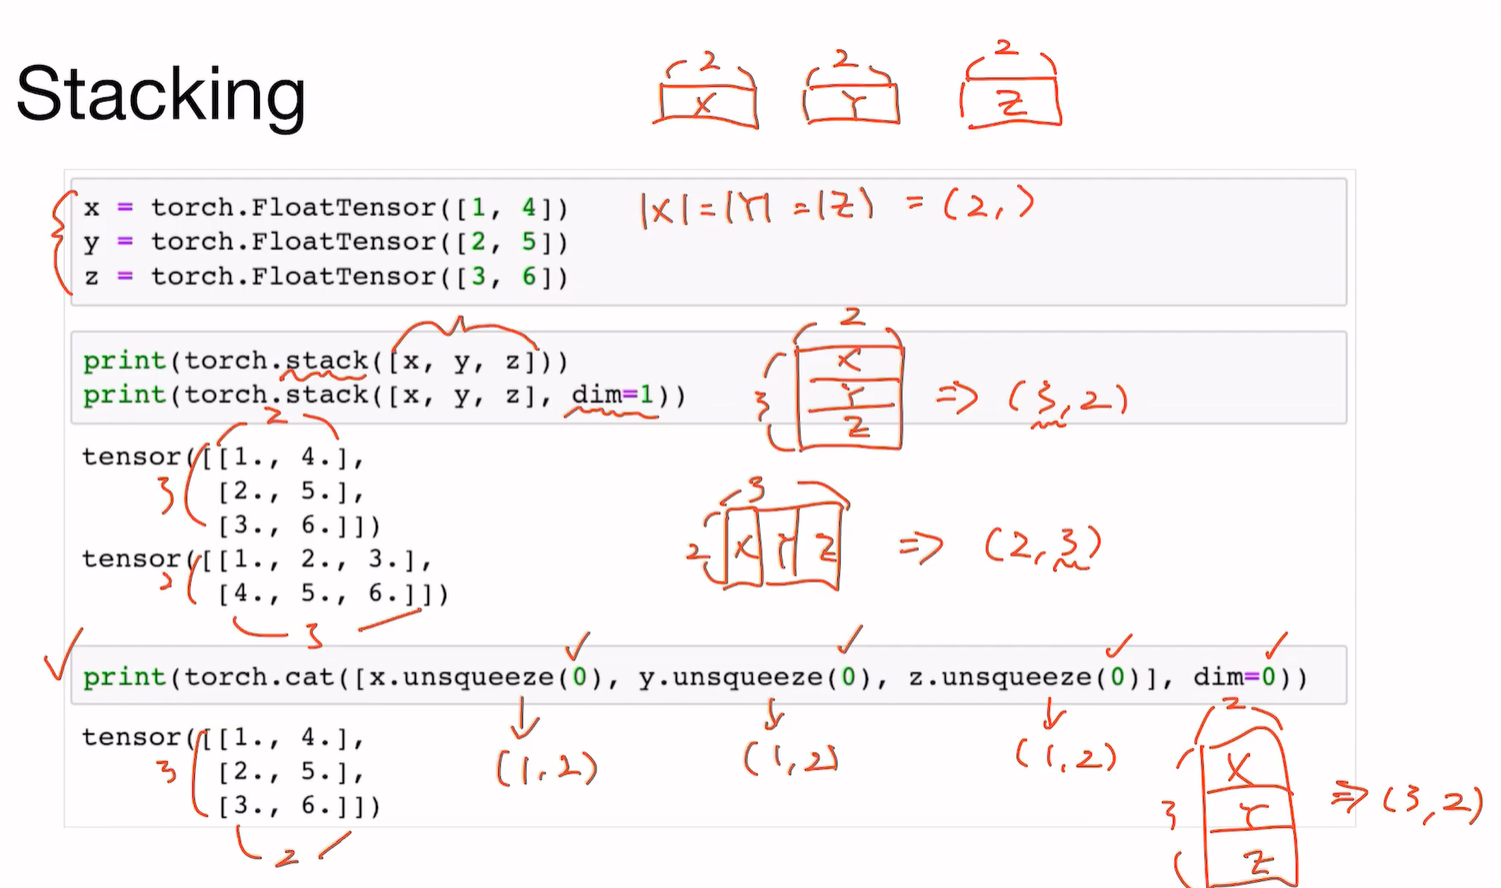

In [ ]:
# 기본값 dim = 0
print(torch.stack([x, y, z]))
print(torch.stack([x, y, z]).shape)
print(torch.stack([x, y, z], dim=1))
print(torch.stack([x, y, z], dim=1).shape)

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
torch.Size([3, 2])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([2, 3])


In [83]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


Ones and Zeros Like

In [84]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [ ]:
# 같은 shape 의 성분만 다름 -> device 도 똑같이 갈것이다.
print(torch.ones_like(x))
print(torch.zeros_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In-place Operation

In [87]:
x = torch.FloatTensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print(x.mul(2.)) # x에 2를 곱한 새로운 텐서를 출력함
print(x) # 하지만 원본 x는 변하지 않고 그대로임
print(x.mul_(2.)) # x 자체가 바뀌어버림
print(x) 

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


Miscellaneous

Zip

In [89]:
for x, y in zip([1, 2, 3], [4, 5, 6]):
    print(x, y)

1 4
2 5
3 6


In [90]:
for x, y, z in zip([1, 2, 3], [4, 5, 6], [7, 8, 9]):
    print(x, y, z)

1 4 7
2 5 8
3 6 9
